In [72]:
from systems.parse import parse
from systems.viz import as_dot
from IPython.core.display import HTML

import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

def as_html(model, results):
    rendered = model.render_html(results)    
    return HTML(rendered)

def results_for_spec(spec, rounds):
    model = parse(spec)
    results = model.run(rounds=rounds)
    return model, results

def multi_result_chart(title, xlabel, ylabel, key, named_results):
    named_lines = {}
    for name, results in named_results.items():
        named_lines[name] = [x[key] for x in results]

    fig, ax = plt.subplots(figsize=(9, 4), layout='constrained')

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if len(named_lines) == 1:
        line = list(named_lines.values())[0]
        ax.plot(line)
        return ax
    else:
        for name, line in named_lines.items():
            ax.plot(line, label=name)
        ax.legend()
        return ax

def simple_chart(title, xlabel, ylabel, key, results):
    named_results = {'': results}
    return multi_result_chart(title, xlabel, ylabel, key, named_results)

In [75]:
spec = """
# City population is 10,000
CityPop(10000)

# 100 folks apply to become drivers per round
CityPop > AppliedDrivers @ 100

# 25% of applied drivers become eligible each round
AppliedDrivers > EligibleDrivers @ Leak(0.25)

# This is "Request missing information", with 10% of folks moving backwards
# each round
EligibleDrivers > AppliedDrivers @ Leak(0.1)

# 25% of eligible drivers onboard each round
EligibleDrivers > OnboardedDrivers @ Leak(0.25)

# 50% of onboarded drivers become active
OnboardedDrivers > ActiveDrivers @ Leak(0.50)

# 10% of active drivers depart voluntarily and involuntarily
ActiveDrivers > DepartedDrivers @ Leak(0.10)
ActiveDrivers > SuspendedDrivers @ Leak(0.10)

# 5% of DepartedDrivers become active
DepartedDrivers > ActiveDrivers @ Leak(0.05)
# 1% of SuspendedDrivers are reactivated
SuspendedDrivers > ActiveDrivers @ Leak(0.01)
"""

model1, results1 = results_for_spec(spec, 250)

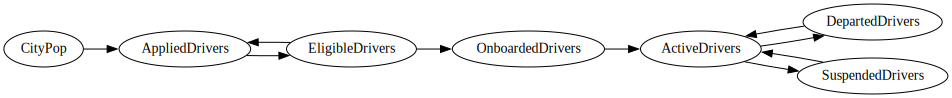

In [76]:
as_dot(model1)

In [77]:
as_html(model1, results1)

Round,CityPop,AppliedDrivers,EligibleDrivers,OnboardedDrivers,ActiveDrivers,DepartedDrivers,SuspendedDrivers
0,10000,0,0,0,0,0,0
1,9900,100,0,0,0,0,0
2,9800,175,25,0,0,0,0
3,9700,233,61,6,0,0,0
4,9600,279,100,18,3,0,0
5,9500,317,137,34,12,0,0
6,9400,348,172,51,27,1,1
7,9300,373,204,69,48,3,3
8,9200,395,231,86,74,7,7
9,9100,414,255,100,104,13,14


<Axes: title={'center': 'ActiveDrivers Over Time'}, xlabel='Time', ylabel='# ActiveDrivers'>

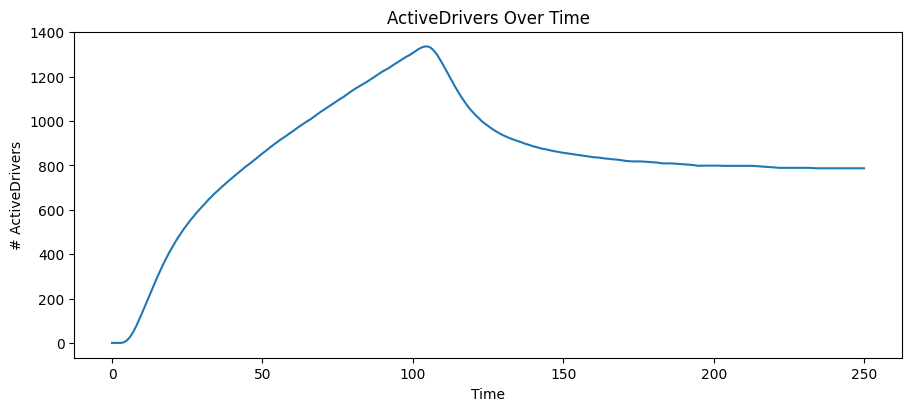

In [78]:
simple_chart('ActiveDrivers Over Time', 'Time', '# ActiveDrivers', 'ActiveDrivers', results1)

<Axes: title={'center': 'ActiveDrivers Over Time'}, xlabel='Time', ylabel='# ActiveDrivers'>

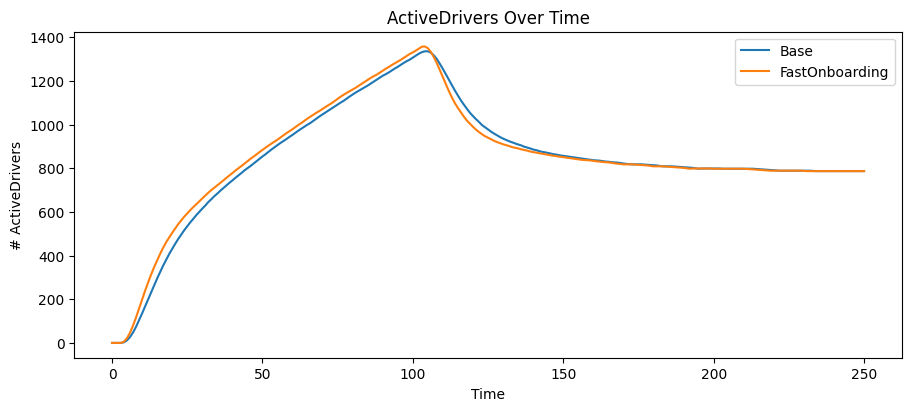

In [81]:
## Exercise 2
spec2 = """
# City population is 10,000
CityPop(10000)

# 100 folks apply to become drivers per round
CityPop > AppliedDrivers @ 100

# 25% of applied drivers become eligible each round
AppliedDrivers > EligibleDrivers @ Leak(0.25)

# This is "Request missing information", with 10% of folks moving backwards
# each round
EligibleDrivers > AppliedDrivers @ Leak(0.1)

# 25% of eligible drivers onboard each round
# EligibleDrivers > OnboardedDrivers @ Leak(0.25)
EligibleDrivers > OnboardedDrivers @ Leak(0.50)

# 50% of onboarded drivers become active
OnboardedDrivers > ActiveDrivers @ Leak(0.50)

# 10% of active drivers depart voluntarily and involuntarily
ActiveDrivers > DepartedDrivers @ Leak(0.10)
ActiveDrivers > SuspendedDrivers @ Leak(0.10)

# 5% of DepartedDrivers become active
DepartedDrivers > ActiveDrivers @ Leak(0.05)
# 1% of SuspendedDrivers are reactivated
SuspendedDrivers > ActiveDrivers @ Leak(0.01)
"""
model2, results2 = results_for_spec(spec2, 250)

combined1 = {'Base': results1, 'FastOnboarding': results2}
multi_result_chart('ActiveDrivers Over Time', 'Time', '# ActiveDrivers', 'ActiveDrivers', combined1)

<Axes: title={'center': 'ActiveDrivers Over Time'}, xlabel='Time', ylabel='# ActiveDrivers'>

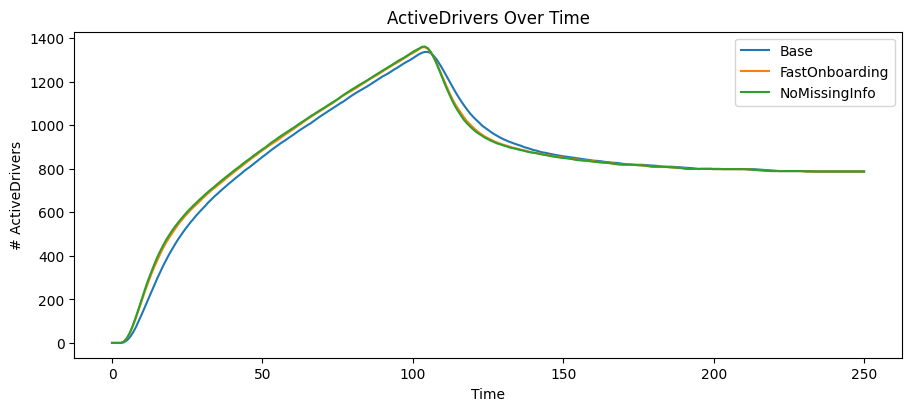

In [84]:
## Exercise 3
spec3 = """
# City population is 10,000
CityPop(10000)

# 100 folks apply to become drivers per round
CityPop > AppliedDrivers @ 100

# 25% of applied drivers become eligible each round
AppliedDrivers > EligibleDrivers @ Leak(0.25)

# This is "Request missing information", with 10% of folks moving backwards
# each round
# EligibleDrivers > AppliedDrivers @ Leak(0.1)

# 25% of eligible drivers onboard each round
# EligibleDrivers > OnboardedDrivers @ Leak(0.25)
EligibleDrivers > OnboardedDrivers @ Leak(0.50)

# 50% of onboarded drivers become active
OnboardedDrivers > ActiveDrivers @ Leak(0.50)

# 10% of active drivers depart voluntarily and involuntarily
ActiveDrivers > DepartedDrivers @ Leak(0.10)
ActiveDrivers > SuspendedDrivers @ Leak(0.10)

# 5% of DepartedDrivers become active
DepartedDrivers > ActiveDrivers @ Leak(0.05)
# 1% of SuspendedDrivers are reactivated
SuspendedDrivers > ActiveDrivers @ Leak(0.01)
"""
model3, results3 = results_for_spec(spec3, 250)
combined3 = {'Base': results1, 'FastOnboarding': results2, 'NoMissingInfo': results3}
multi_result_chart('ActiveDrivers Over Time', 'Time', '# ActiveDrivers', 'ActiveDrivers', combined3)

<Axes: title={'center': 'ActiveDrivers Over Time'}, xlabel='Time', ylabel='# ActiveDrivers'>

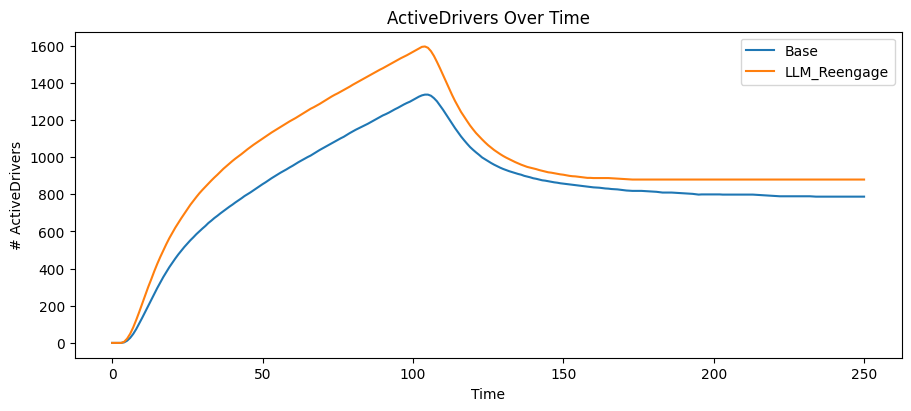

In [86]:
## Exercise 4
spec4 = """
# City population is 10,000
CityPop(10000)

# 100 folks apply to become drivers per round
CityPop > AppliedDrivers @ 100

# 25% of applied drivers become eligible each round
AppliedDrivers > EligibleDrivers @ Leak(0.25)

# This is "Request missing information", with 10% of folks moving backwards
# each round
# EligibleDrivers > AppliedDrivers @ Leak(0.1)

# 25% of eligible drivers onboard each round
# EligibleDrivers > OnboardedDrivers @ Leak(0.25)
EligibleDrivers > OnboardedDrivers @ Leak(0.50)

# 50% of onboarded drivers become active
OnboardedDrivers > ActiveDrivers @ Leak(0.50)

# 10% of active drivers depart voluntarily and involuntarily
ActiveDrivers > DepartedDrivers @ Leak(0.10)
ActiveDrivers > SuspendedDrivers @ Leak(0.10)

# 20% of DepartedDrivers become active
# DepartedDrivers > ActiveDrivers @ Leak(0.05)
DepartedDrivers > ActiveDrivers @ Leak(0.2)

# 1% of SuspendedDrivers are reactivated
SuspendedDrivers > ActiveDrivers @ Leak(0.01)
"""
model4, results4 = results_for_spec(spec4, 250)
combined4 = {'Base': results1, 'LLM_Reengage': results4}
multi_result_chart('ActiveDrivers Over Time', 'Time', '# ActiveDrivers', 'ActiveDrivers', combined4)

<Axes: title={'center': 'ActiveDrivers Over Time'}, xlabel='Time', ylabel='# ActiveDrivers'>

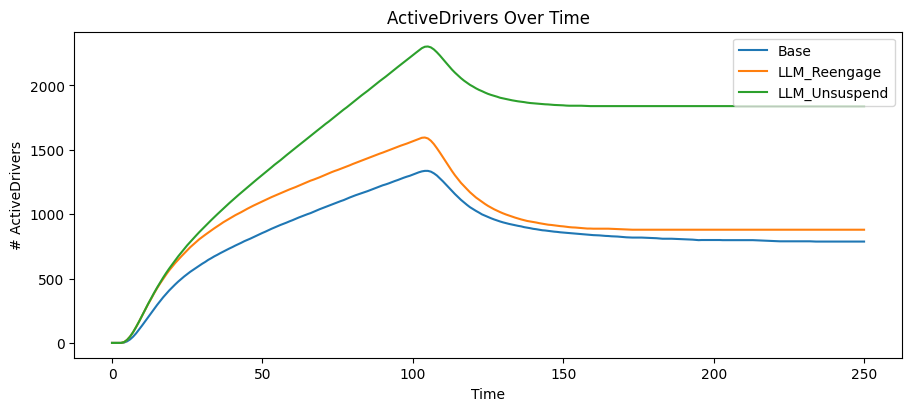

In [92]:
## Exercise 5: faster reactivate of suspended accounts
spec5 = """
# City population is 10,000
CityPop(10000)

# 100 folks apply to become drivers per round
CityPop > AppliedDrivers @ 100

# 25% of applied drivers become eligible each round
AppliedDrivers > EligibleDrivers @ Leak(0.25)

# This is "Request missing information", with 10% of folks moving backwards
# each round
# EligibleDrivers > AppliedDrivers @ Leak(0.1)

# 25% of eligible drivers onboard each round
# EligibleDrivers > OnboardedDrivers @ Leak(0.25)
EligibleDrivers > OnboardedDrivers @ Leak(0.50)

# 50% of onboarded drivers become active
OnboardedDrivers > ActiveDrivers @ Leak(0.50)

# 10% of active drivers depart voluntarily and involuntarily
ActiveDrivers > DepartedDrivers @ Leak(0.10)
ActiveDrivers > SuspendedDrivers @ Leak(0.10)

# 20% of DepartedDrivers become active
# DepartedDrivers > ActiveDrivers @ Leak(0.05)
DepartedDrivers > ActiveDrivers @ Leak(0.2)

# 2.5% of SuspendedDrivers are reactivated
#SuspendedDrivers > ActiveDrivers @ Leak(0.01)
SuspendedDrivers > ActiveDrivers @ Leak(0.025)
"""
model5, results5 = results_for_spec(spec5, 250)
combined5 = {'Base': results1, 'LLM_Reengage': results4, 'LLM_Unsuspend': results5}
multi_result_chart('ActiveDrivers Over Time', 'Time', '# ActiveDrivers', 'ActiveDrivers', combined5)